# Assignment 1- DNN Lab



### Step 1: Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
%tensorflow_version X.X
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


### Step 2: Import Data

In [ ]:

df = pd.read_csv('hcvdat0.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
# prompt: unique values in df['Category']

unique_values = df['Category'].unique()
print(unique_values)


['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [ ]:
df.isnull().sum()

,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


####Visualise distributions

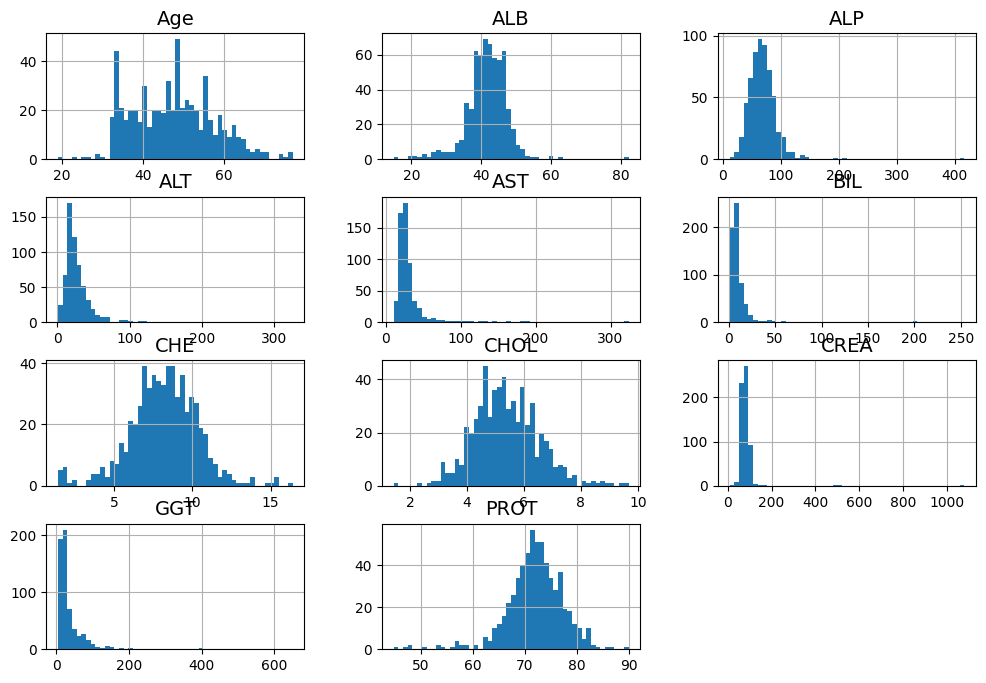

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))

plt.show()

### Step 3: Data *Preprocessing*

Categorical: Target Encoding: 'Category'

### Numerical Data Preprocessing

Variables: 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'

Simple imputer(for missing values): 'ALB', 'ALP', 'ALT', 'CHOL', 'PROT'
Transformations:
* log transformation: 'ALT', 'AST', 'BIL', 'GGT'
(need simple imputer before transformation since it has missing values)
* Quantile transformation: housing_median_age: 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'CHE', 'CHOL', 'CREA', 'PROT'
(need simple imputer before transformation since it has missing values)

####Pipelines and transformers

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder,  QuantileTransformer, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error


In [ ]:
import pandas as pd

**Train/Validation Split**

In [ ]:
# df = pd.read_csv('hcvdat0.csv')
# df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 4,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
}


df['Category'] = df['Category'].map(mapping)


In [ ]:
df['Category'].head()

,Category
0,0
1,0
2,0
3,0
4,0


In [ ]:
# prompt: one-hot ncode category

from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'Category' is your target column
# You can adjust this based on your specific needs
# Create a new column for each category

y = df['Category']

# Convert the target variable to one-hot encoding
y_onehot = keras.utils.to_categorical(y, num_classes=5)



In [ ]:
from sklearn.model_selection import train_test_split

# Features are all columns except 'Target'
X = df.drop('Category', axis=1)
# Target variable is 'Target'
y = df['Category']


# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (492, 12)
X_test shape: (123, 12)
y_train shape: (492, 5)
y_test shape: (123, 5)


In [ ]:
df["Sex"].value_counts()

,count
Sex,
m,377
f,238


In [ ]:
#spac_attribs = ["Category"]
quant_attribs = ['Age', 'ALB', 'ALP', 'CHE', 'CHOL', 'CREA', 'PROT']
log_attribs = ['ALT', 'AST', 'BIL', 'GGT']
cat_attribs = ["Sex"]


#Pipelines
log_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)),
                         ("log transform", PowerTransformer(method = 'box-cox'))])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])
quantile_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)),
                              ("quantile transformer", QuantileTransformer(n_quantiles=100)),
                              ("standard scaling", StandardScaler())])


In [ ]:
preprocessing = ColumnTransformer([
                    #("spatial", "passthrough", spac_attribs),
                    ("quant", quantile_pipeline, quant_attribs),
                    ("log", log_pipeline, log_attribs),
                    ("categorical", cat_pipeline, cat_attribs)
                ])

### Step 4: Build Model

https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

https://keras.io/optimizers/

####Basic functions

In [ ]:
#fitting after train-test splitting
def pipelines_fitting(X_train, y_train, preprocessing):
    X_train_processed = preprocessing.fit_transform(X_train, y_train)
    X_df = pd.DataFrame(
        X_train_processed,
        columns=preprocessing.get_feature_names_out(),
        index=X_train.index)
    return X_df


In [ ]:
#Evaluating model pipeline with Linear regression
def evaluate_model(model_pipeline, X, y):
    from sklearn.metrics import mean_absolute_error
    y_pred = model_pipeline.predict(X)
    model_mae = mean_absolute_error(y, y_pred)
    return(model_mae)



In [ ]:
# Preprocess data
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep = preprocessing.fit_transform(X_test)


In [ ]:
# Create a dataframe from the preprocessed data
X_train_prep = pd.DataFrame(X_train_prep, columns=preprocessing.get_feature_names_out())
X_test_prep = pd.DataFrame(X_test_prep, columns=preprocessing.get_feature_names_out())

In [ ]:
X_train_prep

,quant__Age,quant__ALB,quant__ALP,quant__CHE,quant__CHOL,quant__CREA,quant__PROT,log__ALT,log__AST,log__BIL,log__GGT,categorical__Sex_f,categorical__Sex_m
0,-0.891424,-1.257280,0.348499,-1.370863,-0.786030,0.088299,-1.380764,0.320511,-0.018687,-0.290832,-0.061522,0.0,1.0
1,-0.891424,1.013921,-0.274264,0.286630,-0.646272,0.088299,0.925386,-0.210389,-0.404294,2.059324,-0.656754,0.0,1.0
2,0.786041,0.672612,-0.402447,-0.874089,-0.401694,-0.610431,-0.052980,-0.763523,-1.251170,0.158519,-0.408013,0.0,1.0
3,1.240355,-1.690902,-0.926835,-1.500390,-1.599435,-1.694481,-1.704377,0.837762,1.802394,-0.380439,0.411133,1.0,0.0
4,-1.537948,0.121616,1.695061,0.017215,0.198983,-1.671185,0.663324,-0.784351,-2.849120,-1.461123,0.134717,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.978792,-0.594237,-0.230465,1.478150,1.450106,1.380951,0.313907,1.881628,1.120590,0.545448,1.559656,0.0,1.0
488,-0.716688,0.732711,0.619944,1.318276,-1.235254,-0.173725,-0.018039,0.099919,-0.822437,-0.234538,0.012290,0.0,1.0
489,1.310250,-0.629156,-1.140579,-0.487415,-1.540275,0.717157,-0.122864,0.112547,-0.616398,1.547986,-0.371062,0.0,1.0
490,0.139518,0.636222,-0.926835,0.573024,1.317504,-0.173725,0.313907,-0.568133,-0.321412,-0.862593,-1.526330,1.0,0.0


**Build Model**

In [ ]:
# Assume X_train_prep is your training data and y_train is one-hot encoded
num_classes = 5  # Replace with your actual number of classes

baseline_model = keras.Sequential([
    keras.layers.Dense(13, activation='relu', input_shape=(X_train_prep.shape[1],)),
    keras.layers.Dense(num_classes, activation='softmax')  # Softmax in the output layer
])

#optimizer = tf.keras.optimizers.RMSprop(0.001) # Gradient Descent algorithm
#optimizer = tf.keras.optimizers.Adam()

# Compile the model with categorical_crossentropy
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 5)                   │              70 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252 (1008.00 B)

 Trainable params: 252 (1008.00 B)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
b_history = baseline_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8951 - loss: 0.4141 
Test Accuracy: 0.89


In [ ]:
# Regularized model

baseline_model = keras.Sequential()
baseline_model.add(keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],))),
baseline_model.add(keras.layers.Dense(32, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(32, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(32, activation=tf.nn.relu,)),

baseline_model.add(keras.layers.Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop() # Gradient Descent algorithm
optimizer = tf.keras.optimizers.Adam()

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,253 (20.52 KB)

 Trainable params: 5,253 (20.52 KB)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

class TrackValidationLoss(keras.callbacks.Callback):
    def __init__(self):
        super(TrackValidationLoss, self).__init__()
        self.lowest_val_loss = np.inf  # Start with infinity

    def on_epoch_end(self, epoch, logs):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.lowest_val_loss:
            self.lowest_val_loss = current_val_loss
            print(f'\nLowest validation loss updated: {self.lowest_val_loss:.4f}')

# Create an instance of the custom callback
track_val_loss = TrackValidationLoss()

EPOCHS = 200
b_history = baseline_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot(), track_val_loss])



.
Lowest validation loss updated: 1.2838
.
Lowest validation loss updated: 0.8876
.
Lowest validation loss updated: 0.8701
.
Lowest validation loss updated: 0.7421
.
Lowest validation loss updated: 0.6531
.
Lowest validation loss updated: 0.6295
.
Lowest validation loss updated: 0.5812
.
Lowest validation loss updated: 0.5596
.
Lowest validation loss updated: 0.5462
.
Lowest validation loss updated: 0.5279
..
Lowest validation loss updated: 0.5241
........................................................................................
....................................................................................................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8855 - loss: 1.6380 
Test Accuracy: 0.87


**Lowest Validation Error**

In [ ]:
# Print the lowest validation error
lowest_validation_error = min(b_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 0.5241


### Step 5: Plot Results

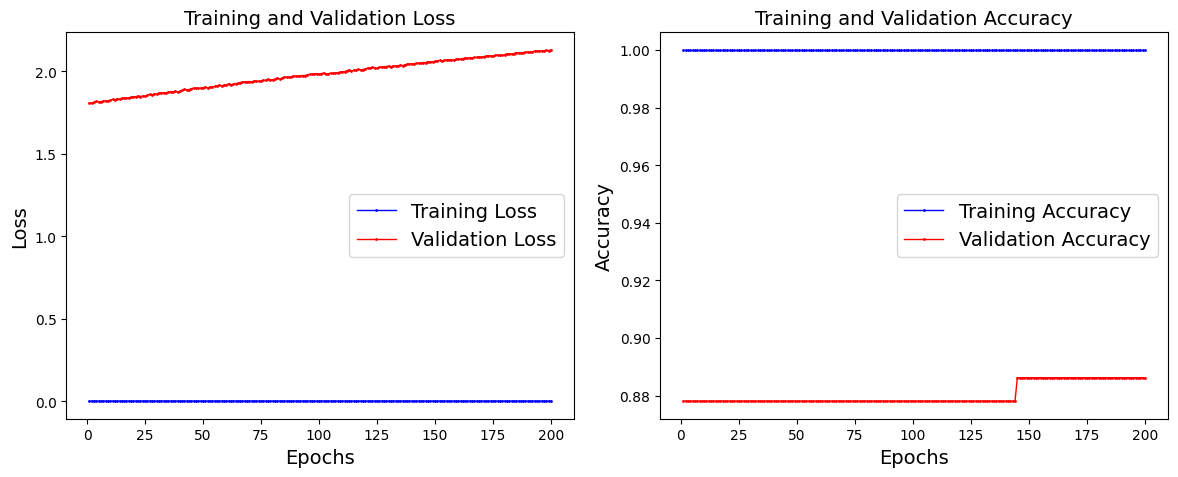

In [ ]:
# Plotting results
train_loss = b_history.history['loss']
val_loss = b_history.history['val_loss']
train_accuracy = b_history.history['accuracy']
val_accuracy = b_history.history['val_accuracy']

# Set the number of epochs for x-axis
epochs_range = range(1, EPOCHS + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'bo-', label='Training Loss', linewidth=1, markersize=1)
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss', linewidth=1, markersize=1)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, 'bo-', label='Training Accuracy', linewidth=1, markersize=1)
plt.plot(epochs_range, val_accuracy, 'ro-', label='Validation Accuracy', linewidth=1, markersize=1)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Predictions

In [ ]:
valpreds = baseline_model.predict_on_batch(X_test_prep)
print(valpreds)

[[-5.80714166e-01  4.08699214e-02 -3.26558232e-01  2.72685587e-01
   3.72779310e-01]
 [-3.46880168e-01  1.15019493e-01 -2.57234335e-01  1.16964236e-01
   4.14799541e-01]
 [-2.54731208e-01  2.94011906e-02 -7.86229223e-02  1.71446308e-01
   2.01288193e-01]
 [-4.69755441e-01  4.02433991e-01 -5.22922754e-01  2.84124345e-01
   6.22261226e-01]
 [-5.91908336e-01  1.56987429e-01 -3.27471554e-01  2.76623726e-01
   4.69970405e-01]
 [-4.05986875e-01 -1.55801773e-01 -3.22514623e-01  4.79448318e-01
   2.40383267e-01]
 [-4.24496919e-01  7.55074769e-02 -2.92173624e-01  2.78430939e-01
   3.32423300e-01]
 [-2.63159990e-01 -1.43677235e-01 -2.53640622e-01  3.25901210e-01
   1.78642243e-01]
 [-8.54102910e-01  1.80450484e-01 -2.60264575e-01  3.81398797e-01
   4.84614611e-01]
 [-1.61623985e-01 -4.56569716e-03 -9.18433219e-02  1.50509477e-01
   1.54823452e-01]
 [-4.76460367e-01  1.12881921e-01 -2.70739228e-01  3.17376554e-01
   2.39329427e-01]
 [-3.02695751e-01  3.48964483e-02 -2.05686346e-01  2.22590968e-01

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(y_test)

248    0
365    0
432    0
610    3
132    0
602    3
188    0
2      0
271    0
77     0
286    0
244    0
109    0
374    0
137    0
367    0
209    0
101    0
204    0
555    1
441    0
199    0
590    3
299    0
544    1
381    0
522    0
210    0
268    0
611    3
10     0
145    0
304    0
375    0
148    0
181    0
514    0
603    3
55     0
82     0
110    0
290    0
311    0
390    0
131    0
559    1
30     0
570    2
456    0
551    1
403    0
211    0
447    0
533    4
70     0
260    0
76     0
278    0
585    3
604    3
536    4
24     0
320    0
569    2
398    0
571    2
29     0
264    0
259    0
322    0
550    1
280    0
257    0
140    0
78     0
81     0
227    0
63     0
388    0
72     0
287    0
208    0
575    2
579    2
104    0
450    0
212    0
316    0
6      0
607    3
135    0
235    0
272    0
155    0
538    4
177    0
613    3
86     0
182    0
532    0
284    0
277    0
549    1
548    1
354    0
563    1
234    0
73     0
39     0
163    0
482    0
6

<BarContainer object of 32 artists>

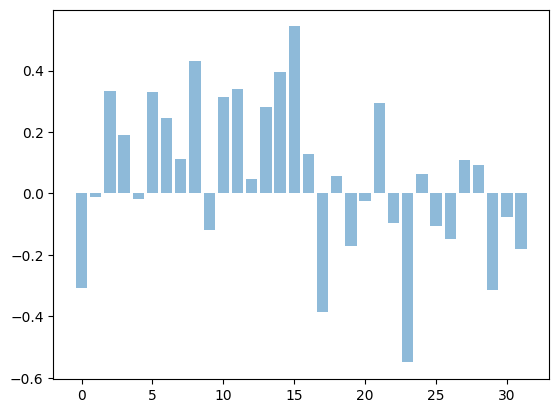

In [ ]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))

plt.bar(y_pos, nfw, align='center', alpha=0.5)

### Regularized Model

In [ ]:
l1_model = keras.Sequential([
    keras.layers.Dense(15, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],)),
   # keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    #keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(10, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.02), activation=tf.nn.relu),
    keras.layers.Dense(5, activation='softmax')

  ])

l1_model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

l2_model = keras.Sequential([
    keras.layers.Dense(15, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],)),
   # keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    #keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(5, activation='softmax')
  ])

l2_model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
l1_history = l1_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])
l2_history = l2_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = l1_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8220 - loss: 0.6120 
Test Accuracy: 0.80


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = l2_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.5337 
Test Accuracy: 0.84


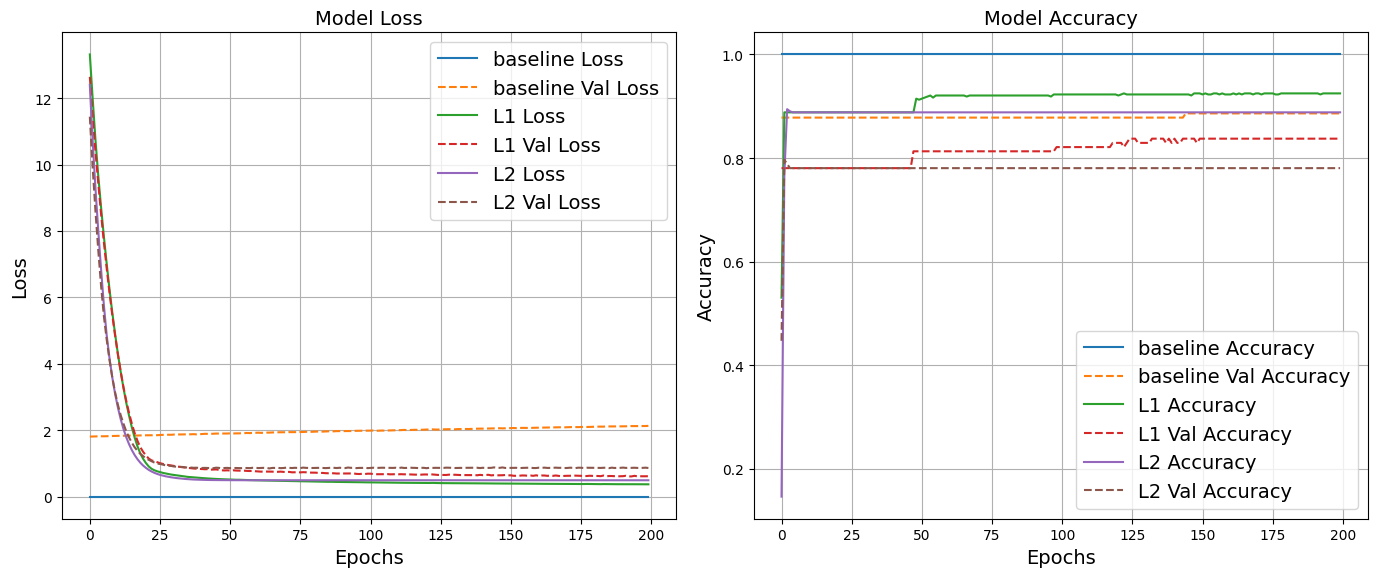

In [ ]:
def plot_history(histories):
    plt.figure(figsize=(14, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    for label, history in histories:
        plt.plot(history.history['loss'], label=f'{label} Loss')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    for label, history in histories:
        plt.plot(history.history['accuracy'], label=f'{label} Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{label} Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
plot_history([('baseline', b_history),
               ('L1', l1_history),
               ('L2', l2_history)])

#Other Models

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.utils import to_categorical


###Batch Normalization

In [ ]:
# Example model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape= (X_train_prep.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train_prep, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2212 - loss: 2.6441 - val_accuracy: 0.2121 - val_loss: 1.7035
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1971 - loss: 2.4209 - val_accuracy: 0.4646 - val_loss: 1.5112
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2861 - loss: 2.1435 - val_accuracy: 0.7172 - val_loss: 1.3309
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3045 - loss: 1.9640 - val_accuracy: 0.8586 - val_loss: 1.1687
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3384 - loss: 1.8706 - val_accuracy: 0.9091 - val_loss: 1.0213
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4467 - loss: 1.6342 - val_accuracy: 0.9293 - val_loss: 0.8952
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4765 - loss: 1.4853 - val_accuracy: 0.9394 - val_loss: 0.7807
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5864 - loss: 1.3082 - val_accuracy: 0.9495 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8950 - loss: 0.2730 
Test Accuracy: 0.88


###Activation fn- Leaky RElu

In [ ]:
# Build model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_prep.shape[1],)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train_prep, y_train, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4138 - loss: 1.4887 - val_accuracy: 0.8990 - val_loss: 0.9068
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9059 - loss: 0.7469 - val_accuracy: 0.8990 - val_loss: 0.5277
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8838 - loss: 0.5148 - val_accuracy: 0.8990 - val_loss: 0.3891
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8803 - loss: 0.3761 - val_accuracy: 0.9394 - val_loss: 0.3362
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9208 - loss: 0.2841 - val_accuracy: 0.9394 - val_loss: 0.3068
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9111 - loss: 0.2836 - val_accuracy: 0.9495 - val_loss: 0.2870
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9323 - loss: 0.2459 - val_accuracy: 0.9495 - val_loss: 0.2705
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9460 - loss: 0.2176 - val_accuracy: 0.9596 - val_loss: 0

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_prep, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8952 - loss: 0.9446 
Test Loss: 0.9902909398078918, Test Accuracy: 0.8943089246749878


###Increased depth, Leaky RElu, Batch Normalisation

In [ ]:
# Build model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_prep.shape[1],)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_prep, y_train, epochs=200, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.2092 - loss: 2.1434 - val_accuracy: 0.4949 - val_loss: 1.5214
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2352 - loss: 1.8965 - val_accuracy: 0.8485 - val_loss: 1.3827
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3548 - loss: 1.6987 - val_accuracy: 0.9293 - val_loss: 1.2469
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4218 - loss: 1.4845 - val_accuracy: 0.9293 - val_loss: 1.1076
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5261 - loss: 1.3060 - val_accuracy: 0.9394 - val_loss: 0.9651
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5811 - loss: 1.2243 - val_accuracy: 0.9394 - val_loss: 0.8479
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6373 - loss: 1.1672 - val_accuracy: 0.9596 - val_loss: 0.7421
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6944 - loss: 1.0812 - val_accuracy: 0.959

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_prep, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9067 - loss: 0.3837 
Test Loss: 0.42674562335014343, Test Accuracy: 0.8943089246749878


#Conclusion


*   The accuracy the model using a naïve approach: 0.89
*   The accuracy of the best model: 0.894





**Comparison: **

*   Baseline model: 0.89
*   Leaky RElu: 0.894
*   Batch Normalization: 0.88
*   Increase depth, Leaky RElu, Batch Normalization: 0.894


Batch normalization gives an accuracy less than the baseline model, however other models give a better accuracy than the baseline model.
These models may not be perfect, since the comparison of test and validation accuracies, overfitting are supposed to be addressed
